In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from matplotlib import cm
from sympy import symbols,diff
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def f(x):
    return x**2+x+1

In [3]:
x_1=np.linspace(-3,3,500)
x_1
len(x_1)

500

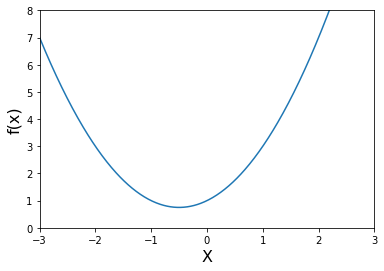

In [4]:
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))

In [5]:
def df(x):
    return 2*x+1

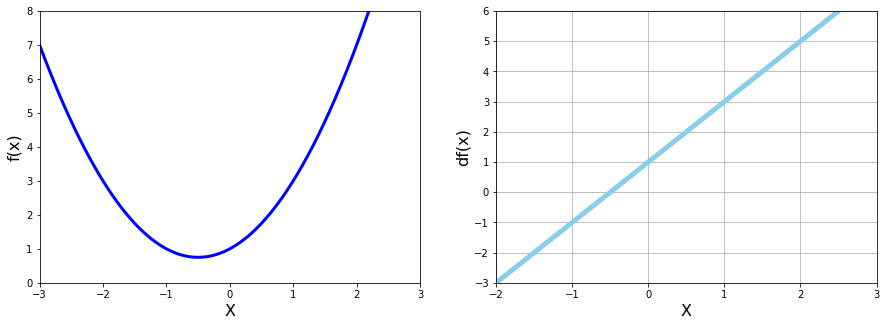

In [6]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)
plt.grid()


In [7]:
new_x=3
previous_x=0
step_multiplier=0.1
precision=0.00001
x_list=[new_x]
slope_list=[df(new_x)]
for n in range(500):
    previous_x=new_x
    gradient=df(previous_x)
    #print(gradient)
    new_x=previous_x-step_multiplier*gradient
    #print(new_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size=abs(new_x-previous_x)
    if(step_size<precision):
        print("Loop ran times",n)
        break
print("Local Minimum Occurs at :",new_x)
print("Slope at this point is :",df(new_x))
print("Cost at this point :",f(new_x))

Loop ran times 50
Local Minimum Occurs at : -0.49996003706460423
Slope at this point is : 7.992587079153068e-05
Cost at this point : 0.7500000015970362


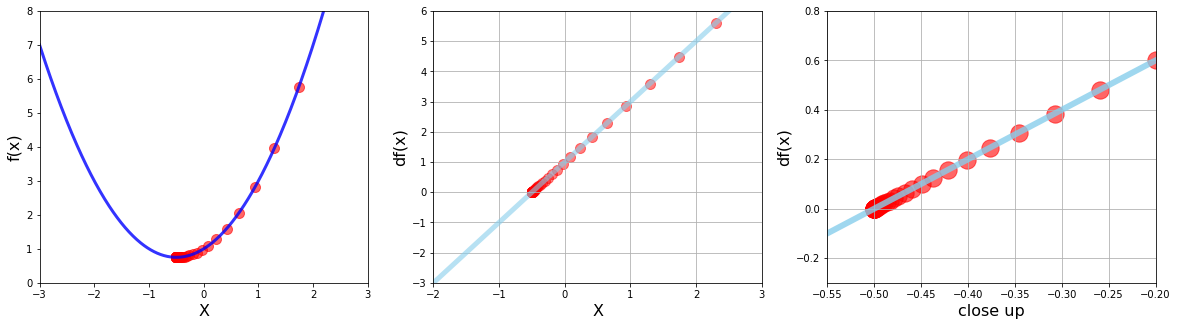

In [8]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.8)
values=np.array(x_list)
plt.scatter(x=x_list,y=f(values),color='red',s=100,alpha=0.6)

plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(x=x_list,y=slope_list,color='red',s=100,alpha=0.5)
plt.grid()

plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.xlabel('close up',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=6,alpha=0.8)
plt.scatter(x=x_list,y=slope_list,color='red',s=300,alpha=0.6)

plt.grid()


# New Function
## $$ g(x)= x^4-4x^2+5$$

In [9]:
x_2=np.linspace(-2,2,1000)
def g(x):
    return x**4-4*(x**2)+5
def dg(x):
    return 4*(x**3)-8*x


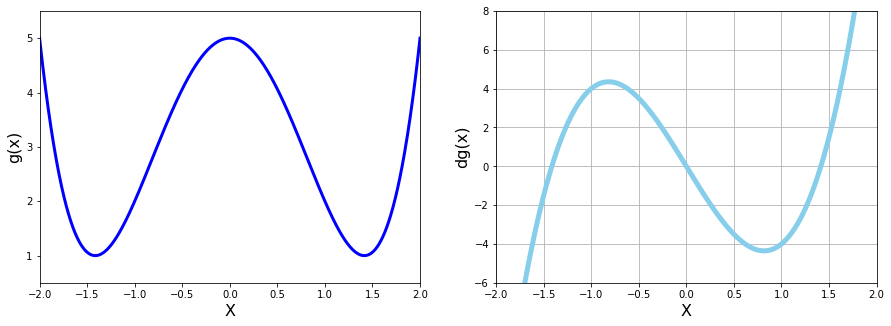

In [10]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)
plt.grid()


In [11]:
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=300):
    
    new_x=initial_guess
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]
    for n in range(max_iter):
        previous_x=new_x
        gradient=derivative_func(previous_x)

        new_x=previous_x-multiplier*gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size=abs(new_x-previous_x)
        if(step_size<precision):
            break
    return new_x,x_list,slope_list

In [12]:
local_min,list_x,derivative_list=gradient_descent(derivative_func=dg,initial_guess=-0.1)
                                                
print("Local min occurs at :",local_min)
print("Number of steps :",len(list_x))


Local min occurs at : -1.4120887490901561
Number of steps : 34


In [13]:
local_min,list_x,derivative_list=gradient_descent(derivative_func=dg,initial_guess=0.1,
                                                  multiplier=0.01,precision=0.0001)
                                                
print("Local min occurs at :",local_min)
print("Number of steps :",len(list_x))

Local min occurs at : 1.413709226894381
Number of steps : 77


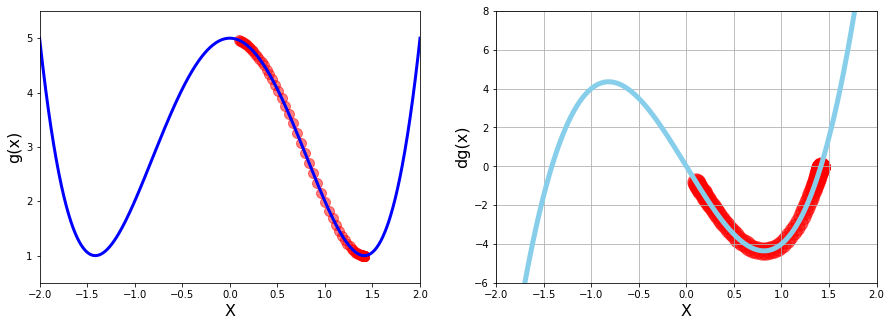

In [14]:
local_min,list_x,derivative_list=gradient_descent(derivative_func=dg,initial_guess=0.1,
                                                  multiplier=0.01,precision=0.0001)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)
plt.scatter(list_x,g(np.array(list_x)),s=100,color='red',alpha=0.5)



plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)
plt.scatter(list_x,derivative_list,s=300,color='red',alpha=0.6)
plt.grid()

# Divergence, Overflow and Python Tuples
## New Function
>$$ h(x)=x^5-2x^4+2 $$

In [15]:
import gd
x_3=np.linspace(-2.5,2.5,1000)


def h(x):
    return x**5-2*x**4+2
def dh(x):
    return 5*x**4-8*x**3


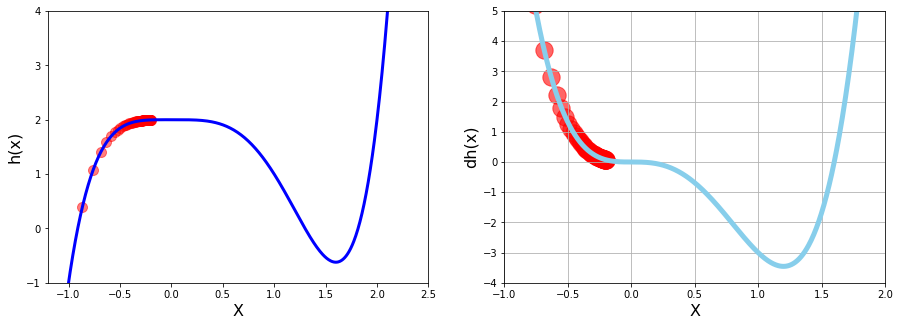

local min  -1.8398461123332792e+24
cost at min is : -2.1081790694225687e+121
steps 72


In [16]:
local_min,list_x,derivative_list=gd.gradient_descent(derivative_func=dh,initial_guess=-0.2,
                                                  max_iter=71)
                                                  
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)
plt.plot(x_3,h(x_3),color='blue',linewidth=3)
plt.scatter(list_x,h(np.array(list_x)),s=100,color='red',alpha=0.5)



plt.subplot(1,2,2)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=5)
plt.scatter(list_x,derivative_list,s=300,color='red',alpha=0.6)
plt.grid()
plt.show()
print("local min ",local_min)
print("cost at min is :",h(local_min))
print("steps",len(list_x))

# Example 4 - Data Viz with 3 d plots
## $$f(x,y)=\frac{1}{3^{-x^2-y^2}+1}$$
### $$f(x,y)=\frac{1}{r+1}$$
where $r$=$3^{-x^2-y^2}$

# Batch Gradient Descent with sympy
## $$\frac{\partial f}{\partial x}=\frac{2x\ln(3)\cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1\right )^2}$$
## $$\frac{\partial f}{\partial y}=\frac{2y\ln(3)\cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1\right )^2}$$

In [17]:
def f(x,y):
    r=3**(-x**2 - y**2) 
    return 1/(r+1)

In [41]:
x_4=np.linspace(-2,2,200)
y_4=np.linspace(-2,2,200)
print(x_4.shape)
x_4,y_4=np.meshgrid(x_4,y_4)
x_4.shape

(200,)


(200, 200)

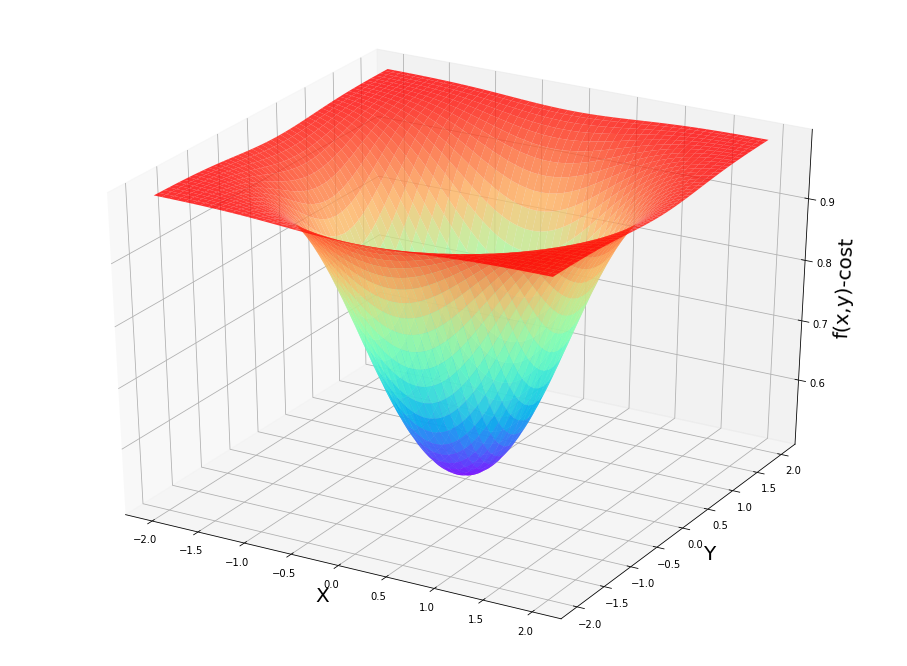

In [19]:
#Generating 3d plot
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-cost',fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.rainbow,alpha=0.8)

In [20]:
a,b=symbols('x,y')
print('Our cost function is :',f(a,b))
print('partial derivative wrt x :',diff(f(a,b),a))
f(a,b).evalf(subs={a:1.8,b:1})
diff(f(a,b),a).evalf(subs={a:1.8,b:1})

Our cost function is : 1/(3**(-x**2 - y**2) + 1)
partial derivative wrt x : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


0.0368089716197505

In [21]:
multiplier=0.1
max_iter=500
params=np.array([1.8,1.0])  #initial guess

for n in range(max_iter):
    gradient_x=diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y=diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier*gradients
    
#results
print("Values in gradient array",gradients)
print("Minimum occurs at x value ",params[0])
print("Minimum occurs at y value ",params[1])
print("The cost is :",f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value  3.45838599885832e-11
Minimum occurs at y value  1.92132555492129e-11
The cost is : 0.500000000000000


In [22]:
def fpx(x,y):
    num=2*x*math.log(3)*(3**(-x**2-y**2))
    den=((3**(-x**2-y**2)+1)**2)
    return num/den
def fpy(x,y):
    num_y=2*y*math.log(3)*(3**(-x**2-y**2))
    den_y=((3**(-x**2-y**2)+1)**2)
    return num_y/den_y


In [23]:
multiplier=0.1
max_iter=500
params=np.array([1.8,1.0])  #initial guess

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier*gradients
    
#results
print("Values in gradient array",gradients)
print("Minimum occurs at x value ",params[0])
print("Minimum occurs at y value ",params[1])
print("The cost is :",f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value  3.458385998858304e-11
Minimum occurs at y value  1.9213255549212797e-11
The cost is : 0.5


## Graphing 3-D Gradient descent and advanced numpy arrays

In [24]:
multiplier=0.1
max_iter=500
params=np.array([1.8,1.0])  #initial guess
values_array=params.reshape(1,2)
print(values_array.shape)
for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier*gradients
    values_array=np.append(values_array,params.reshape(1,2),axis=0)
#results
print("Values in gradient array",gradients)
print("Minimum occurs at x value ",params[0])
print("Minimum occurs at y value ",params[1])
print("The cost is :",f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value  3.458385998858304e-11
Minimum occurs at y value  1.9213255549212797e-11
The cost is : 0.5


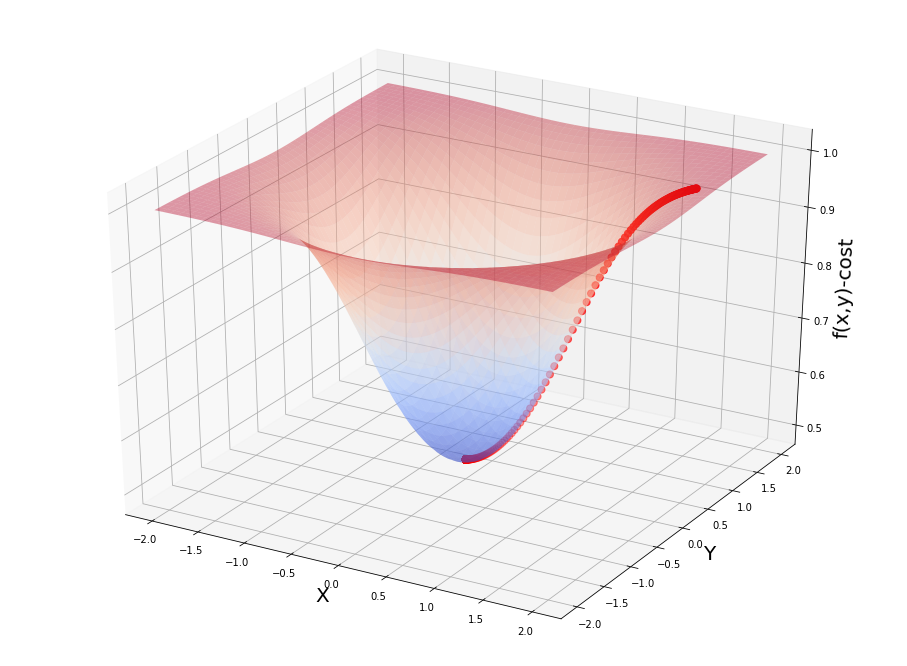

In [25]:
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-cost',fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]),s=50,
           color='red')

# Working with data and a real  cost function
## Mean squared error : a cost function for regression
 > $$RSS=\sum_{i=1}^{n}\big(y^{i}-h_\theta x^{i} \big)^2$$
 > $$MSE=\frac{1}{n}\sum_{i=1}^{n}\big(y-\hat{y} \big)^2$$

In [26]:
# make sample data
x_5=np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5=np.array([1.7,2.4,3.5,3,6.1,9.4,8.2]).reshape(7,1)


In [27]:
regr=LinearRegression()
regr.fit(x_5,y_5)
print("theta 0:",regr.intercept_[0])
print("theta 1:",regr.coef_[0][0])

theta 0: 0.8475351486029536
theta 1: 1.2227264637835915


Text(0, 0.5, 'Y values')

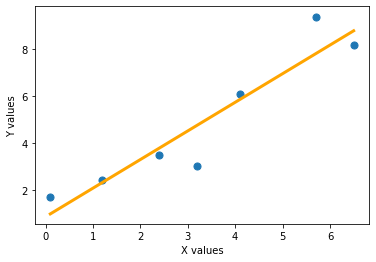

In [28]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color='orange',linewidth=3)
plt.xlabel("X values")
plt.ylabel("Y values")

In [29]:
y_hat=regr.intercept_[0]+regr.coef_[0][0]*x_5
print("Estimated Values are y_hat:\n",y_hat)
print("Actual y values are :\n",y_5)

Estimated Values are y_hat:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y values are :
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [30]:
def mse(y,y_hat):
    n=len(y_hat)
    mse=0
    for i in range(n):
        mse=mse+(y[i]-y_hat[i])**2
    return 1/n*mse

In [31]:
print("Manually calculated mse is %f"%(mse(y_5,y_hat)))
print("MSE regression using manual calc is",mean_squared_error(y_5,y_hat))
print("MSE regression using manual calc is",mean_squared_error(y_5,regr.predict(x_5)))

Manually calculated mse is 0.947966
MSE regression using manual calc is 0.9479655759794577
MSE regression using manual calc is 0.9479655759794577


## 3d plot for mse cost function
### Make data for thetas

In [32]:
nr_thetas=200
th_0=np.linspace(-1,3,nr_thetas)
th_1=np.linspace(-1,3,nr_thetas)
plot_t0,plot_t1=np.meshgrid(th_0,th_1)


In [33]:
#mse using nested for
plot_cost=np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat=plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,y_hat)
print("shape of plot_t0   : ",plot_t0.shape)
print("shape of plot_t1   : ",plot_t1.shape)
print("shape of plot_cost : ",plot_cost.shape)

shape of plot_t0   :  (200, 200)
shape of plot_t1   :  (200, 200)
shape of plot_cost :  (200, 200)


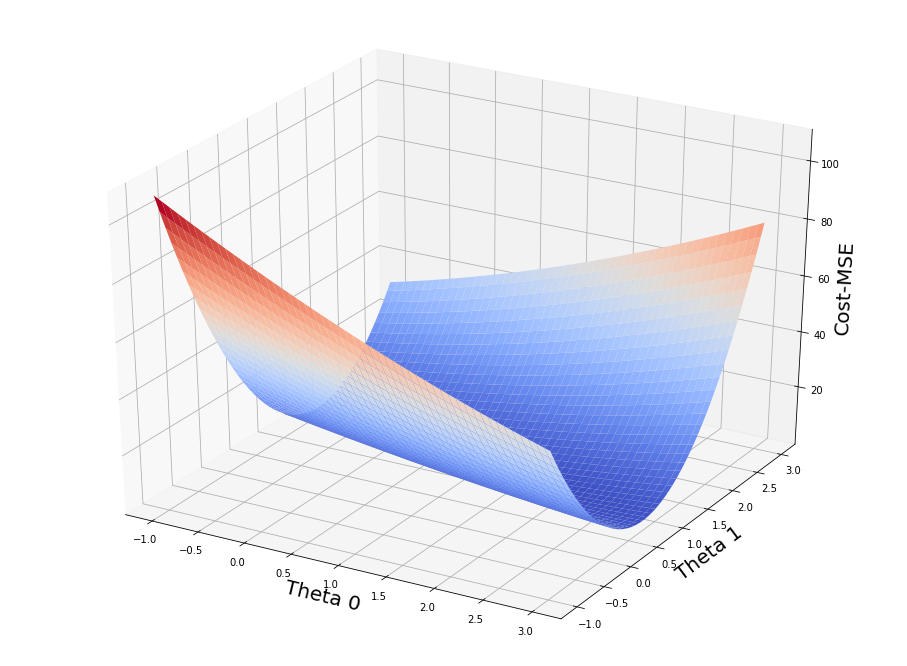

In [34]:
#plotting mse
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel("Theta 0",fontsize=20)
ax.set_ylabel("Theta 1",fontsize=20)
ax.set_zlabel("Cost-MSE",fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.coolwarm)

In [35]:
ij_min=np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
ij_min
print(plot_t0[111][91])
print(plot_t1[111][91])

0.829145728643216
1.2311557788944723


# Partial derivates of Mse wrt $\theta_0$ and wrt $\theta_1$
## $$\frac{\partial Mse}{\partial \theta_0}=-\frac{2}{n}\sum_{i=1}^{n}$$

In [36]:
def grad(x,y,thetas):
    n=y.size
    theta0_slope=(-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope=(-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)
    return np.array([theta0_slope[0],theta1_slope[0]])
    #return np.append(theta0_slope,theta1_slope)
    #return np.concatenate(theta0_slope,theta1_slope,axis=0)

In [37]:
multiplier=0.01
thetas=np.array([2.9,2.9])

plot_vals=thetas.reshape(1,2)
mse_vals=mse(y_5,thetas[0]+thetas[1]*x_5)



for i in range(1000):
    thetas=thetas-multiplier*grad(x_5,y_5,thetas)
    plot_vals=np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals=np.append(mse_vals,mse(y_5,thetas[0]+thetas[1]*x_5))
    
    
print('Min occurs at',thetas[0])
print('Min at theta1',thetas[1])
print('Mse',mse(y_5,thetas[0]+thetas[1]*x_5))

Min occurs at 0.8532230461743415
Min at theta1 1.2214935332607393
Mse [0.94797511]


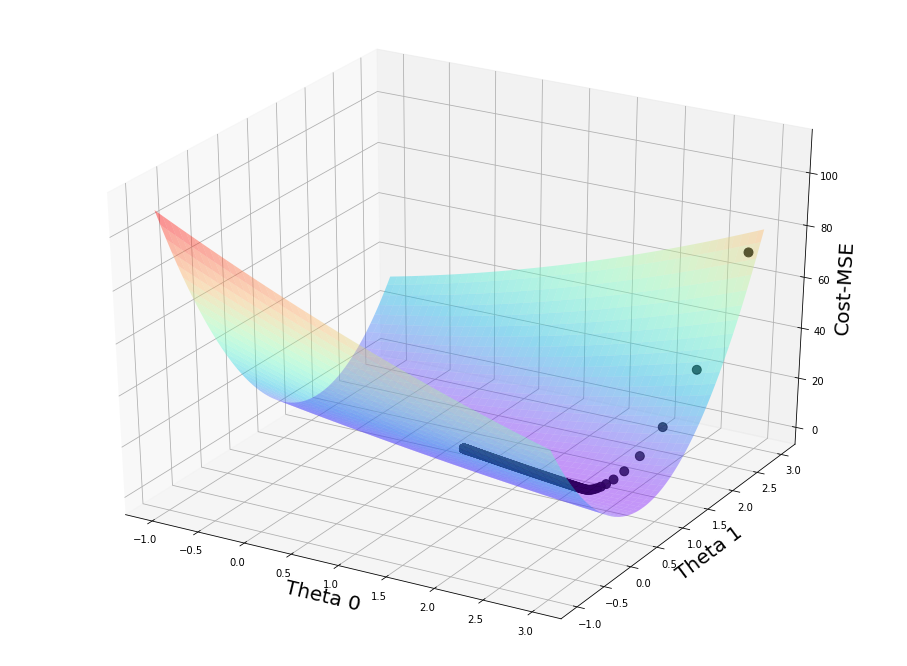

In [38]:
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel("Theta 0",fontsize=20)
ax.set_ylabel("Theta 1",fontsize=20)
ax.set_zlabel("Cost-MSE",fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.4)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,color='black')